# 김가네 팀플 (4) 데이터 분석 (군집화)_ 230622
- 팀원 별로 분담해서 분석 진행
- 워드클라우드 시각화 완료
- 군집화 진행

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('mode.chained_assignment',  None)

In [99]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('CS.csv', encoding='euc-kr')
CS.info()
CS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


## 군집화 진행

### K-Modes 군집화 알고리즘 사용

In [100]:
# K-Modes 패키지 설치
# !pip install kmodes

In [101]:
# K-Modes 모듈 import
from kmodes.kmodes import KModes

## 군집화를 위한 데이터 전처리
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링
- 장애등록여부 제외
- 종사상 지위 제외

### 코드 기준 축소
- expense열과 expense_f열 카테고리가 너무 많은 것을 우려,  
- 같은 분야별로 코드 기준 축소

### 연속형 종속변수 범주형으로 변경
- view_cnt 열을 범주형으로 변경하여 진행

In [102]:
# 군집화를 위한 데이터프레임 추출
CS_clustering = CS[['view_cnt', 'expense', 'expense_f', 'sex', 'age', 'education', 'married', 'work', 'income', 'sido']]

CS_clustering

,view_cnt,expense,expense_f,sex,age,education,married,work,income,sido
0,49,14,14,2,5,3,1,5,3,1
1,3,14,9,2,5,3,2,5,7,1
2,6,8,15,1,2,3,1,5,6,1
3,22,14,14,2,4,4,2,5,5,1
4,16,14,14,2,3,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...
20619,59,12,12,2,4,4,2,1,6,1
20620,49,12,12,2,3,4,2,5,4,1
20621,4,17,12,1,5,4,2,2,6,1
20622,58,12,12,2,4,4,2,5,5,1


### 비용 지출 관련 2개 열 코드 기준 축소
- expense : 과거에 지출했던 문화예술행사 분야
- expense_f : 미래에 지출할 의향이 있는 분야

#### 변경된 카테고리 info
- 1 : '문학/미술'
- 2 : '서양음악'
- 3 : '전통예술'
- 4 : '연극/뮤지컬'
- 5 : '무용'
- 6 : '영화'
- 7 : '대중음악'
- 8 : '기타'
- 9 : '해당사항없음'


In [8]:
# 축소 전 코드 기준
expense_words = {
    1:'문학',
    2:'미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'전시회',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [9]:
# 바꿀 코드 기준
expense_newctg = {
    1:'문학/미술',
    2:'문학/미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'문학/미술',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [10]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [11]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_clustering[column].value_counts(ascending=False)

expense
14    5771
17    5233
12    4786
5     1081
15     747
1      706
8      560
7      511
11     248
9      238
13     201
16     189
2       89
10      87
6       67
4       65
3       45
Name: count, dtype: int64

expense_f
12    5837
14    4724
15    2161
17    1801
1      876
5      780
9      745
11     740
13     687
8      570
16     459
7      440
10     297
6      166
4      135
2      129
3       77
Name: count, dtype: int64

In [12]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg, expense_newctg]

In [13]:
# 코드 변경 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []
    
    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])
    
    return setting_done_list

In [14]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_clustering[column] = get_list_setting_column(CS_clustering[column], setting_codes[i])

In [15]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_clustering[column].value_counts(ascending=False)

expense
영화        6282
연극/뮤지컬    5867
해당사항없음    5233
대중음악      1307
문학/미술     1033
전통예술       313
무용         268
기타         189
서양음악       132
Name: count, dtype: int64

expense_f
연극/뮤지컬    6617
영화        5164
대중음악      2731
해당사항없음    1801
문학/미술     1750
전통예술       875
무용         853
기타         459
서양음악       374
Name: count, dtype: int64

### 머신러닝 학습을 위해 문자형 기준을 다시 수치형으로 변경!!
- '문학/미술' : 1
- '서양음악' : 2
- '전통예술' : 3
- '연극/뮤지컬' : 4
- '무용' : 5
- '영화' : 6
- '대중음악' : 7
- '기타' : 8
- '해당사항없음' : 9

In [16]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [17]:
# 다시 수치형으로 바꿀 코드 기준
expense_newctg_final = {
    '문학/미술' : 1,
    '서양음악' : 2,
    '전통예술' : 3,
    '연극/뮤지컬' : 4,
    '무용' : 5,
    '영화' : 6,
    '대중음악' : 7,
    '기타' : 8,
    '해당사항없음' : 9
}

In [18]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg_final, expense_newctg_final]

In [19]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_clustering[column] = get_list_setting_column(CS_clustering[column], setting_codes[i])

In [20]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_clustering[column].value_counts(ascending=False)

expense
6    6282
4    5867
9    5233
7    1307
1    1033
3     313
5     268
8     189
2     132
Name: count, dtype: int64

expense_f
4    6617
6    5164
7    2731
9    1801
1    1750
3     875
5     853
8     459
2     374
Name: count, dtype: int64

In [21]:
# 범주 축소 완료된 데이터프레임 확인
CS_clustering

,view_cnt,expense,expense_f,sex,age,education,married,work,income,sido
0,49,6,6,2,5,3,1,5,3,1
1,3,6,1,2,5,3,2,5,7,1
2,6,7,7,1,2,3,1,5,6,1
3,22,6,6,2,4,4,2,5,5,1
4,16,6,6,2,3,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...
20619,59,4,4,2,4,4,2,1,6,1
20620,49,4,4,2,3,4,2,5,4,1
20621,4,9,4,1,5,4,2,2,6,1
20622,58,4,4,2,4,4,2,5,5,1


### view_cnt 종속변수 연속형 ---> 범주형 데이터로 변경
- pd.cut() 함수 이용

### 범주 bins 기준
- 0 : 0회
- 5 : 1~5회
- 10 : 6~10회
- 15 : 11~15회
- 20 : 16~20회
- 30 : 21~30회
- 50 : 31~50회
- 730 : 51회이상

### 머신러닝 학습을 위해 문자형 기준을 다시 수치형으로 변경!!

- 0회 : 1
- 1~5회 : 2
- 6~10회 : 3
- 11~15회 : 4
- 16~20회 : 5
- 21~30회 : 6
- 31~50회 : 7
- 51회이상 : 8

<Axes: xlabel='view_cnt', ylabel='Count'>

(0.0, 50.0)

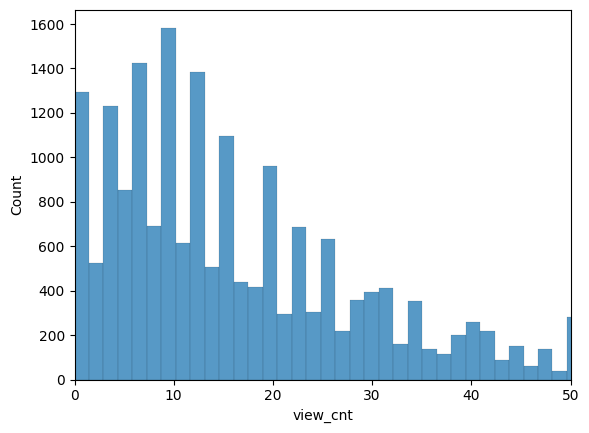

In [22]:
# 변경 전 view_cnt 분포 시각화

sns.histplot(CS_clustering['view_cnt'], bins=500)
plt.xlim(0, 50)

In [23]:
# view_cnt 의 최댓값
CS_clustering['view_cnt'].max()  # 730

# view_cnt의 30 초과 50 이하의 갯수
((CS_clustering['view_cnt'] > 30) & (CS_clustering['view_cnt'] <= 50)).sum()

# view_cnt의 50개 초과의 갯수
(CS_clustering['view_cnt'] > 50).sum()

730

2539

2178

In [24]:
# cut() 이용해서 데이터 범주화 진행

# 카테고리를 나누는 기준 설정 : 구간 경계값
bins = [0, 5, 10, 15, 20, 30, 50, 730]

# 각 구간의 이름 : labels (카테고리명)
# 주의! : 순서는 구간(bins)의 순서와 동일해야 함
labels = [2, 3, 4, 5, 6, 7, 8]

In [25]:
# cut() 함수 : cut(data, bins, labels)
view_cnt_ctgs = pd.cut(CS_clustering['view_cnt'], bins=bins, labels=labels)
view_cnt_ctgs

0        7
1        2
2        3
3        6
4        5
        ..
20619    8
20620    7
20621    2
20622    8
20623    7
Name: view_cnt, Length: 20624, dtype: category
Categories (7, int64): [2 < 3 < 4 < 5 < 6 < 7 < 8]

In [26]:
view_cnt_ctgs_df = pd.DataFrame({'view_cnt' : CS_clustering['view_cnt'], 
                                'view_cnt_ctgs' : list(view_cnt_ctgs)})
view_cnt_ctgs_df

,view_cnt,view_cnt_ctgs
0,49,7.0
1,3,2.0
2,6,3.0
3,22,6.0
4,16,5.0
...,...,...
20619,59,8.0
20620,49,7.0
20621,4,2.0
20622,58,8.0


In [27]:
view_cnt_ctgs_df['view_cnt_ctgs'].value_counts()

view_cnt_ctgs
3.0    3700
4.0    3139
6.0    2885
2.0    2874
7.0    2539
5.0    2282
8.0    2178
Name: count, dtype: int64

In [28]:
# 변경해준 범주형 데이터에 결측값 있는지 확인
view_cnt_ctgs_df['view_cnt'].isnull().sum()
view_cnt_ctgs_df['view_cnt_ctgs'].isnull().sum()

0

1027

In [29]:
# view_cnt_ctgs에 결측값이 있는 행 확인
view_cnt_ctgs_df[view_cnt_ctgs_df['view_cnt_ctgs'].isnull()]

,view_cnt,view_cnt_ctgs
91,0,NaN
93,0,NaN
123,0,NaN
124,0,NaN
125,0,NaN
...,...,...
20532,0,NaN
20578,0,NaN
20580,0,NaN
20584,0,NaN


In [30]:
# cut 함수로 카테고리화 할 때 0에 해당하는 값은 결측값으로 처리된 것을 확인
# 결측값은 '0회'로 대체
view_cnt_ctgs_df['view_cnt_ctgs'] = view_cnt_ctgs_df['view_cnt_ctgs'].fillna(1)

# 결측값 있는지 다시 확인
view_cnt_ctgs_df['view_cnt_ctgs'].isnull().sum()

0

In [31]:
# view_cnt가 0에 해당하는 값들의 범주가 '0회'로 잘 들어갔는지 다시 확인
view_cnt_ctgs_df[view_cnt_ctgs_df['view_cnt'] == 0]

,view_cnt,view_cnt_ctgs
91,0,1.0
93,0,1.0
123,0,1.0
124,0,1.0
125,0,1.0
...,...,...
20532,0,1.0
20578,0,1.0
20580,0,1.0
20584,0,1.0


In [32]:
# CS_clustering 데이터프레임에 view_cnt_ctgs 열 추가
CS_clustering['view_cnt_ctgs'] = view_cnt_ctgs_df['view_cnt_ctgs']

# CS_clustering 데이터프레임에 기존 view_cnt 열 drop
CS_clustering.drop('view_cnt', axis=1, inplace=True)

In [33]:
# CS_clustering 데이터프레임 확인
CS_clustering.head()

,expense,expense_f,sex,age,education,married,work,income,sido,view_cnt_ctgs
0,6,6,2,5,3,1,5,3,1,7.0
1,6,1,2,5,3,2,5,7,1,2.0
2,7,7,1,2,3,1,5,6,1,3.0
3,6,6,2,4,4,2,5,5,1,6.0
4,6,6,2,3,4,1,1,3,1,5.0


In [34]:
# view_cnt_ctgs 데이터 타입 확인
CS_clustering.info()

# float -> int 변환
CS_clustering = CS_clustering.astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   expense        20624 non-null  int64  
 1   expense_f      20624 non-null  int64  
 2   sex            20624 non-null  int64  
 3   age            20624 non-null  int64  
 4   education      20624 non-null  int64  
 5   married        20624 non-null  int64  
 6   work           20624 non-null  int64  
 7   income         20624 non-null  int64  
 8   sido           20624 non-null  int64  
 9   view_cnt_ctgs  20624 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 1.6 MB


In [35]:
# 데이터 타입 전부 정수로 바꼈는지 다시 한번 확인 + Null값 없음 확인
CS_clustering.info()

# view_cnt_ctgs 카테고리별 빈도 확인
CS_clustering['view_cnt_ctgs'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   expense        20624 non-null  int64
 1   expense_f      20624 non-null  int64
 2   sex            20624 non-null  int64
 3   age            20624 non-null  int64
 4   education      20624 non-null  int64
 5   married        20624 non-null  int64
 6   work           20624 non-null  int64
 7   income         20624 non-null  int64
 8   sido           20624 non-null  int64
 9   view_cnt_ctgs  20624 non-null  int64
dtypes: int64(10)
memory usage: 1.6 MB


view_cnt_ctgs
3    3700
4    3139
6    2885
2    2874
7    2539
5    2282
8    2178
1    1027
Name: count, dtype: int64

### 기타 전처리 진행
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링
- 장애등록여부 제외
- 종사상 지위 제외

In [36]:
# 종사상 지위 column 제외
CS_clustering.drop('work', axis=1, inplace=True)

In [37]:
# 연령대 50, 60대만 포함
CS_clustering = CS_clustering[(CS_clustering['age'] == 5) | (CS_clustering['age'] == 6)]

In [38]:
# 시도 서울, 경기만 포함
CS_clustering = CS_clustering[(CS_clustering['sido'] == 1) | (CS_clustering['sido'] == 9)]

### 군집화 적용 전 최종 전처리 완료된 데이터프레임 확인
- 데이터 개수 :  2144

In [98]:
CS_clustering

,expense,expense_f,sex,education,married,income
0,6,6,2,3,1,3
1,6,1,2,3,2,7
6,6,6,2,4,3,5
7,9,3,1,4,2,6
9,7,4,2,3,2,5
...,...,...,...,...,...,...
20595,4,4,1,4,2,3
20599,9,4,2,3,2,6
20605,7,7,2,2,2,4
20618,8,8,2,3,2,6


### 'sido', 'age', 'view_cnt_ctgs' 제외하기

In [40]:
CS_clustering = CS_clustering.drop(columns=['sido', 'age', 'view_cnt_ctgs'], axis=1)

CS_clustering

,expense,expense_f,sex,education,married,income
0,6,6,2,3,1,3
1,6,1,2,3,2,7
6,6,6,2,4,3,5
7,9,3,1,4,2,6
9,7,4,2,3,2,5
...,...,...,...,...,...,...
20595,4,4,1,4,2,3
20599,9,4,2,3,2,6
20605,7,7,2,2,2,4
20618,8,8,2,3,2,6


---
# 군집화 적용

## Elbow Curve (엘보우 커브) 시각화 
- 최적의 군집 개수 (n_clusters) 찾기

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

array([0, 0, 0, ..., 0, 0, 1], dtype=uint16)

array([0, 0, 0, ..., 2, 0, 1], dtype=uint16)

array([0, 0, 0, ..., 2, 0, 1], dtype=uint16)

array([0, 0, 0, ..., 4, 0, 1], dtype=uint16)

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'cost')

Text(0.5, 1.0, 'elbow method for finding optimal K')

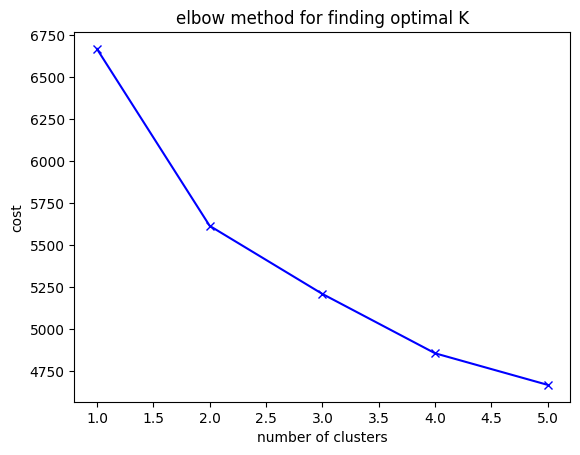

In [41]:
# 엘보우 커브 시각화
cost = []
K = range(1, 6)
for num in K:
    kmode = KModes(n_clusters = num, n_init = 3)
    kmode.fit_predict(CS_clustering)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.title('elbow method for finding optimal K')
plt.show()

# 시각화 결과 K값을 2 또는 3으로 진행해야겠다고 판단

### 군집의 개수가 2일 때

In [42]:
# 군집화 적용 전 데이터프레임 확인
test_df_2 = CS_clustering.copy()

test_df_2

,expense,expense_f,sex,education,married,income
0,6,6,2,3,1,3
1,6,1,2,3,2,7
6,6,6,2,4,3,5
7,9,3,1,4,2,6
9,7,4,2,3,2,5
...,...,...,...,...,...,...
20595,4,4,1,4,2,3
20599,9,4,2,3,2,6
20605,7,7,2,2,2,4
20618,8,8,2,3,2,6


In [43]:
kmode = KModes(n_clusters = 2, n_init = 3)
clusters = kmode.fit_predict(test_df_2)
test_df_2['clusters'] = clusters

In [44]:
# 군집 0으로 분류된 데이터 확인
test_df_2.loc[test_df_2.clusters == 0]

,expense,expense_f,sex,education,married,income,clusters
0,6,6,2,3,1,3,0
1,6,1,2,3,2,7,0
6,6,6,2,4,3,5,0
9,7,4,2,3,2,5,0
11,1,5,1,3,3,4,0
...,...,...,...,...,...,...,...
20593,4,4,1,3,2,5,0
20595,4,4,1,4,2,3,0
20599,9,4,2,3,2,6,0
20605,7,7,2,2,2,4,0


In [45]:
# 군집 1로 분류된 데이터 확인
test_df_2.loc[test_df_2.clusters == 1]

,expense,expense_f,sex,education,married,income,clusters
7,9,3,1,4,2,6,1
13,6,2,1,4,2,5,1
15,6,7,1,4,2,7,1
16,6,6,2,4,3,4,1
39,6,6,1,4,2,5,1
...,...,...,...,...,...,...,...
20454,7,7,1,3,2,6,1
20511,9,9,1,3,1,3,1
20554,9,9,1,4,2,5,1
20563,9,6,1,3,2,5,1


### 군집의 개수가 3일 때

In [46]:
# 군집화 적용 전 데이터프레임 확인
test_df_3 = CS_clustering.copy()

test_df_3

,expense,expense_f,sex,education,married,income
0,6,6,2,3,1,3
1,6,1,2,3,2,7
6,6,6,2,4,3,5
7,9,3,1,4,2,6
9,7,4,2,3,2,5
...,...,...,...,...,...,...
20595,4,4,1,4,2,3
20599,9,4,2,3,2,6
20605,7,7,2,2,2,4
20618,8,8,2,3,2,6


In [47]:
kmode = KModes(n_clusters = 3, n_init = 3)
clusters = kmode.fit_predict(test_df_3)
test_df_3['clusters'] = clusters

In [48]:
# 군집 0으로 분류된 데이터 확인
test_df_3.loc[test_df_3.clusters == 0]

,expense,expense_f,sex,education,married,income,clusters
0,6,6,2,3,1,3,0
1,6,1,2,3,2,7,0
6,6,6,2,4,3,5,0
9,7,4,2,3,2,5,0
14,6,6,2,3,2,5,0
...,...,...,...,...,...,...,...
20570,4,4,2,3,2,6,0
20593,4,4,1,3,2,5,0
20595,4,4,1,4,2,3,0
20599,9,4,2,3,2,6,0


In [49]:
# 군집 1로 분류된 데이터 확인
test_df_3.loc[test_df_3.clusters == 1]

,expense,expense_f,sex,education,married,income,clusters
7,9,3,1,4,2,6,1
13,6,2,1,4,2,5,1
16,6,6,2,4,3,4,1
39,6,6,1,4,2,5,1
44,6,6,1,4,2,5,1
...,...,...,...,...,...,...,...
20417,4,4,1,4,2,6,1
20511,9,9,1,3,1,3,1
20554,9,9,1,4,2,5,1
20563,9,6,1,3,2,5,1


In [50]:
# 군집 2로 분류된 데이터 확인
test_df_3.loc[test_df_3.clusters == 2]

,expense,expense_f,sex,education,married,income,clusters
11,1,5,1,3,3,4,2
15,6,7,1,4,2,7,2
35,6,6,2,3,2,4,2
42,6,6,1,3,2,4,2
61,6,6,1,3,3,2,2
...,...,...,...,...,...,...,...
20263,2,2,1,3,2,2,2
20302,9,9,1,3,2,4,2
20451,7,7,1,3,2,4,2
20454,7,7,1,3,2,6,2


결론은 시각화를 해봐야 알겠지만,  
군집을 나누는 분류 기준이 범주의 개수가 적은 열의 영향을 더 많이 받은 걸로 보인다.  
성별, 나이대, 소득, 시도 등

## 군집화 평가 : 실루엣 계수

### 군집의 개수가 2일 때

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 모든 개별 데이터의 실루엣 계수값 구하기
score_samples = silhouette_samples(CS_clustering, test_df_2['clusters'])
score_samples.shape

(2144,)

In [52]:
# 실루엣 계수 칼럼 추가
test_df_2['silhouette_coeff'] = score_samples

# 확인
test_df_2

,expense,expense_f,sex,education,married,income,clusters,silhouette_coeff
0,6,6,2,3,1,3,0,0.092637
1,6,1,2,3,2,7,0,0.135063
6,6,6,2,4,3,5,0,0.052540
7,9,3,1,4,2,6,1,0.057016
9,7,4,2,3,2,5,0,0.103157
...,...,...,...,...,...,...,...,...
20595,4,4,1,4,2,3,0,0.237826
20599,9,4,2,3,2,6,0,-0.060118
20605,7,7,2,2,2,4,0,-0.031446
20618,8,8,2,3,2,6,0,-0.149669


In [53]:
# 모든 데이터의 평균 실루엣 계수값 구하기 
average_score = silhouette_score(CS_clustering, test_df_2['clusters'])
average_score

0.08785965737509796

In [54]:
# 군집별 실루엣 계수값 확인
test_df_2.groupby('clusters')['silhouette_coeff'].mean()

clusters
0    0.110225
1    0.030040
Name: silhouette_coeff, dtype: float64

In [55]:
test_df_2['clusters'].value_counts()

clusters
0    1546
1     598
Name: count, dtype: int64

In [56]:
# 군집 0의 실루엣 계수 값 확인
test_df_2[test_df_2['clusters']==0].head()

,expense,expense_f,sex,education,married,income,clusters,silhouette_coeff
0,6,6,2,3,1,3,0,0.092637
1,6,1,2,3,2,7,0,0.135063
6,6,6,2,4,3,5,0,0.052540
9,7,4,2,3,2,5,0,0.103157
11,1,5,1,3,3,4,0,0.204723


In [57]:
# 군집 1의 실루엣 계수 값 확인
test_df_2[test_df_2['clusters']==1].head()

,expense,expense_f,sex,education,married,income,clusters,silhouette_coeff
7,9,3,1,4,2,6,1,0.057016
13,6,2,1,4,2,5,1,-0.154681
15,6,7,1,4,2,7,1,0.067307
16,6,6,2,4,3,4,1,-0.074725
39,6,6,1,4,2,5,1,-0.001173


In [58]:
# test_df[test_df['clusters_2']==2].head()

<Axes: >

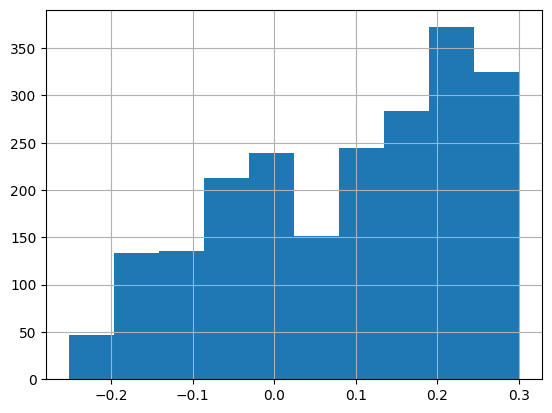

In [59]:
test_df_2['silhouette_coeff'].hist()

### 실루엣 계수 시각화

In [60]:
import matplotlib.cm as cm

In [61]:
from sklearn.cluster import KMeans

In [62]:
from kmodes.kprototypes import KPrototypes

In [63]:
def visualize_silhouette(cluster_lists, X_features):  
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KModes 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
#         clusterer = KModes(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)

        clusterer = KMeans(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
#         clusterer = KPrototypes(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)
#         cluster_labels = clusterer.fit_predict(X_features, categorical=[1,2,3,4,5,6])
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

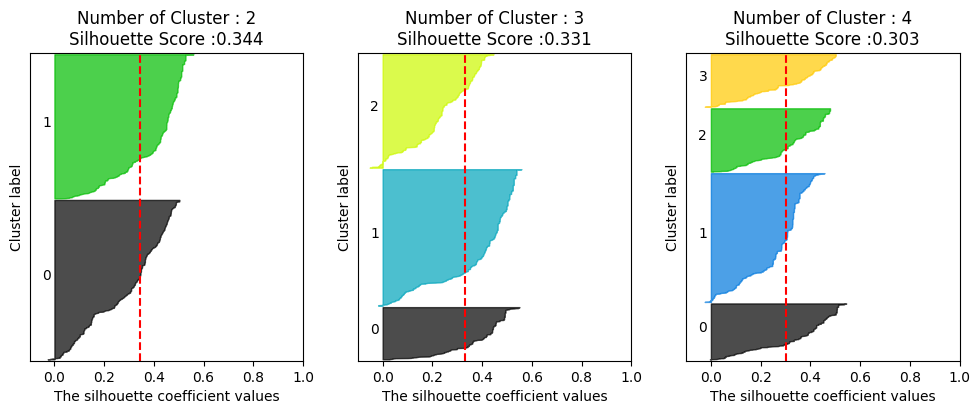

In [64]:
visualize_silhouette([2, 3, 4], CS_clustering)

In [65]:
CS_clustering

,expense,expense_f,sex,education,married,income
0,6,6,2,3,1,3
1,6,1,2,3,2,7
6,6,6,2,4,3,5
7,9,3,1,4,2,6
9,7,4,2,3,2,5
...,...,...,...,...,...,...
20595,4,4,1,4,2,3
20599,9,4,2,3,2,6
20605,7,7,2,2,2,4
20618,8,8,2,3,2,6


In [66]:
CS_clustering['expense'].value_counts() # 지출했던  : 영화

expense
4    709
9    675
6    413
7    139
1    102
8     30
3     29
5     27
2     20
Name: count, dtype: int64

In [67]:
CS_clustering['expense_f'].value_counts() # 지출할 것 : 영화

expense_f
4    854
6    320
7    265
1    216
9    196
5    108
3     74
8     63
2     48
Name: count, dtype: int64

In [68]:
CS_clustering['education'].value_counts() # 1352 : 고졸

education
3    1352
4     514
2     206
1      72
Name: count, dtype: int64

In [69]:
CS_clustering['married'].value_counts() # 1738 : 기혼

married
2    1738
3     333
1      73
Name: count, dtype: int64

In [70]:
CS_clustering['income'].value_counts()

income
5    442
6    422
4    392
3    334
7    286
2    189
1     79
Name: count, dtype: int64

In [71]:
CS_clustering2 = CS_clustering.copy()

In [72]:
from sklearn.preprocessing import StandardScaler



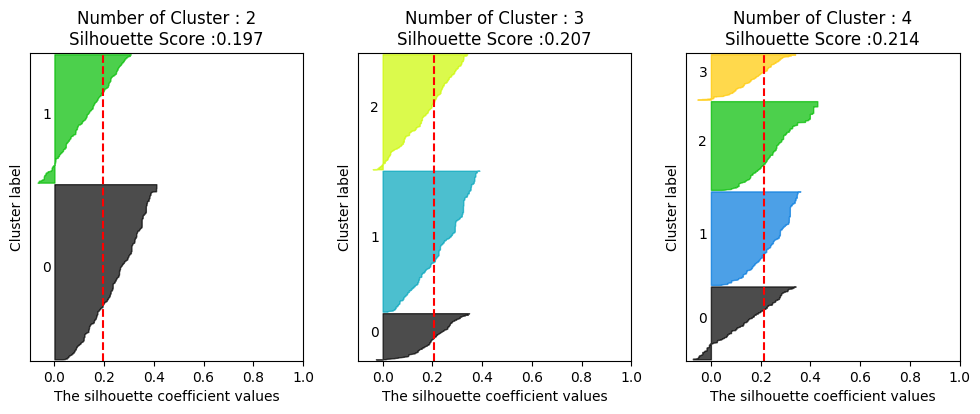

In [73]:
# (1) 스케일링 테스트
CS_clustering2_scaled = StandardScaler().fit_transform(CS_clustering2)
visualize_silhouette([2, 3, 4], CS_clustering2_scaled)

/var/folders/tt/lyghdmvx27z2hqn5lm7q0t1m0000gn/T/ipykernel_18250/278524794.py:3: RuntimeWarning: invalid value encountered in log1p
  CS_clustering2_scaled_log = np.log1p(CS_clustering2_scaled)


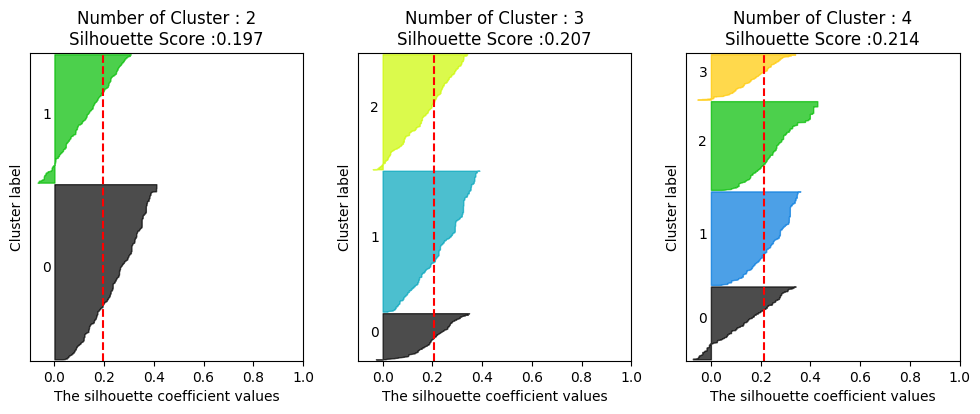

In [74]:
# (2) 로그벼환 테스트 
CS_clustering2_scaled = StandardScaler().fit_transform(CS_clustering2)
CS_clustering2_scaled_log = np.log1p(CS_clustering2_scaled)
visualize_silhouette([2, 3, 4], CS_clustering2_scaled)

In [75]:
CS_clustering2

,expense,expense_f,sex,education,married,income
0,6,6,2,3,1,3
1,6,1,2,3,2,7
6,6,6,2,4,3,5
7,9,3,1,4,2,6
9,7,4,2,3,2,5
...,...,...,...,...,...,...
20595,4,4,1,4,2,3
20599,9,4,2,3,2,6
20605,7,7,2,2,2,4
20618,8,8,2,3,2,6


In [76]:
# 연속형 변수 'view_cnt' 추가
CS2= CS[['view_cnt','expense','expense_f','sex','education','married','income']]

In [77]:
CS2

,view_cnt,expense,expense_f,sex,education,married,income
0,49,14,14,2,3,1,3
1,3,14,9,2,3,2,7
2,6,8,15,1,3,1,6
3,22,14,14,2,4,2,5
4,16,14,14,2,4,1,3
...,...,...,...,...,...,...,...
20619,59,12,12,2,4,2,6
20620,49,12,12,2,4,2,4
20621,4,17,12,1,4,2,6
20622,58,12,12,2,4,2,5


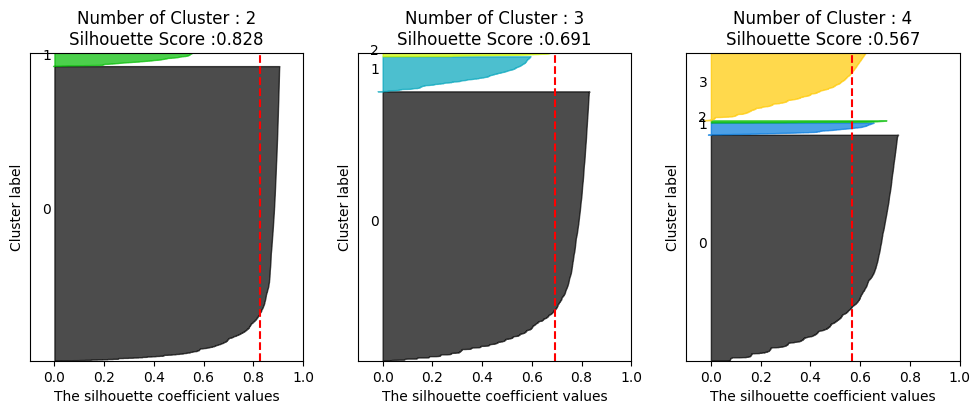

In [78]:
# KPrototypes
visualize_silhouette([2, 3, 4], CS2) # 'view_cnt' 포함된 df로 그룹화

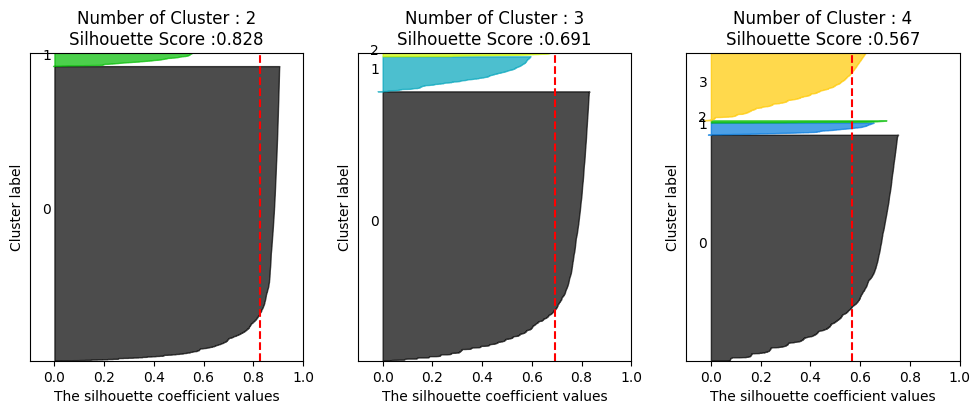

In [79]:
visualize_silhouette([2, 3, 4], CS2)

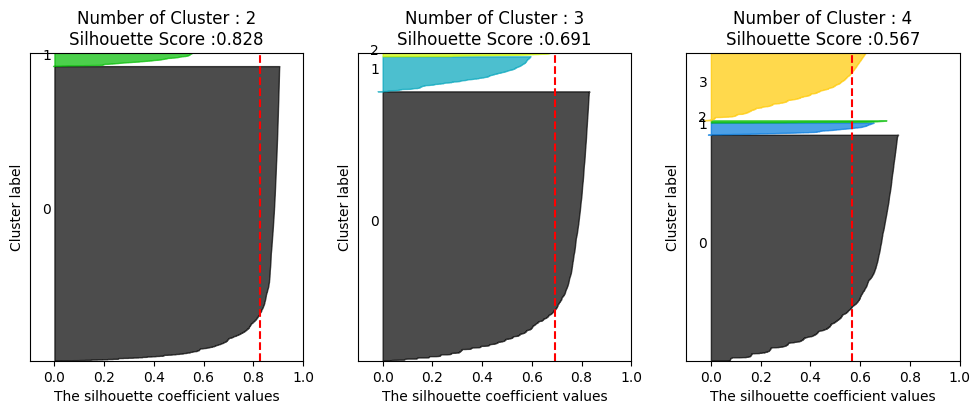

In [80]:
# KMeans : CS2
visualize_silhouette([2, 3, 4], CS2)

In [81]:
CS3 = CS2.copy()

In [82]:
clusterer = KMeans(n_clusters = 2, n_init=10,  max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(CS3)
CS3['cluster_2'] = cluster_labels
CS3

,view_cnt,expense,expense_f,sex,education,married,income,cluster_2
0,49,14,14,2,3,1,3,0
1,3,14,9,2,3,2,7,0
2,6,8,15,1,3,1,6,0
3,22,14,14,2,4,2,5,0
4,16,14,14,2,4,1,3,0
...,...,...,...,...,...,...,...,...
20619,59,12,12,2,4,2,6,0
20620,49,12,12,2,4,2,4,0
20621,4,17,12,1,4,2,6,0
20622,58,12,12,2,4,2,5,0


In [83]:
CS3['cluster_2'].value_counts()

cluster_2
0    19746
1      878
Name: count, dtype: int64

In [85]:
# CS3[CS3['cluster_2']==]

In [86]:
CS4 = CS2.copy()

In [87]:
clusterer = KMeans(n_clusters = 3, n_init=10,  max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(CS4)
CS4['cluster_3'] = cluster_labels
CS4

,view_cnt,expense,expense_f,sex,education,married,income,cluster_3
0,49,14,14,2,3,1,3,1
1,3,14,9,2,3,2,7,0
2,6,8,15,1,3,1,6,0
3,22,14,14,2,4,2,5,0
4,16,14,14,2,4,1,3,0
...,...,...,...,...,...,...,...,...
20619,59,12,12,2,4,2,6,1
20620,49,12,12,2,4,2,4,1
20621,4,17,12,1,4,2,6,0
20622,58,12,12,2,4,2,5,1


In [88]:
CS4['cluster_3'].value_counts()

cluster_3
0    18061
1     2340
2      223
Name: count, dtype: int64

In [89]:
CS4[CS4['cluster_3']==0][['view_cnt']].mean()
CS4[CS4['cluster_3']==0][['view_cnt']].min()
CS4[CS4['cluster_3']==0][['view_cnt']].max()

view_cnt    15.206301
dtype: float64

view_cnt    0
dtype: int64

view_cnt    46
dtype: int64

In [90]:
CS4[CS4['cluster_3']==1][['view_cnt']].mean()
CS4[CS4['cluster_3']==1][['view_cnt']].min()
CS4[CS4['cluster_3']==1][['view_cnt']].max()

view_cnt    77.186325
dtype: float64

view_cnt    47
dtype: int64

view_cnt    180
dtype: int64

In [91]:
CS4[CS4['cluster_3']==2][['view_cnt']].mean()
CS4[CS4['cluster_3']==2][['view_cnt']].min()
CS4[CS4['cluster_3']==2][['view_cnt']].max()

view_cnt    285.255605
dtype: float64

view_cnt    182
dtype: int64

view_cnt    730
dtype: int64

---
# 내가 다시 해본 거!

In [105]:
CS5 = CS_clustering.copy()

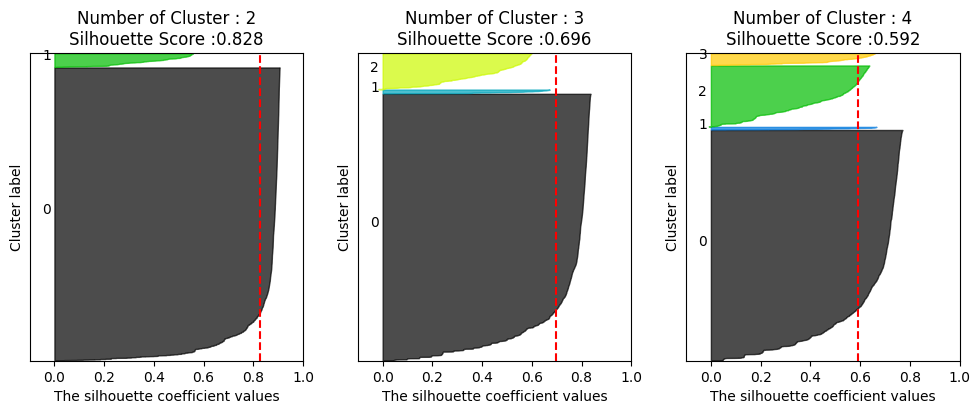

In [115]:
# KPrototypes 군집화 - 실루엣 스코어 시각화
visualize_silhouette([2, 3, 4], CS5)

In [108]:
CS5 = CS5[(CS5['age']==5) | (CS5['age']==6)]
CS5

,view_cnt,expense,expense_f,sex,age,education,married,work,income,sido
0,49,14,14,2,5,3,1,5,3,1
1,3,14,9,2,5,3,2,5,7,1
6,22,14,14,2,5,4,3,1,5,1
7,10,17,11,1,5,4,2,1,6,1
9,7,15,12,2,5,3,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...
20611,10,1,12,1,5,3,3,1,4,4
20613,45,17,15,2,6,2,2,5,6,3
20616,35,1,12,1,5,4,2,3,6,4
20618,7,16,16,2,5,3,2,3,6,1


In [109]:
CS5 = CS5.drop(columns=['sido', 'work'])
CS5

,view_cnt,expense,expense_f,sex,age,education,married,income
0,49,14,14,2,5,3,1,3
1,3,14,9,2,5,3,2,7
6,22,14,14,2,5,4,3,5
7,10,17,11,1,5,4,2,6
9,7,15,12,2,5,3,2,5
...,...,...,...,...,...,...,...,...
20611,10,1,12,1,5,3,3,4
20613,45,17,15,2,6,2,2,6
20616,35,1,12,1,5,4,2,6
20618,7,16,16,2,5,3,2,6


In [121]:
# KPrototype 군집화 (K=3)
clusterer = KPrototypes(n_clusters = 3, n_init=10,  max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(CS5, categorical=[1,2,3,4,5,6,7])
CS5['cluster_3'] = cluster_labels
CS5

,view_cnt,expense,expense_f,sex,age,education,married,income,cluster_3
0,49,14,14,2,5,3,1,3,2
1,3,14,9,2,5,3,2,7,1
6,22,14,14,2,5,4,3,5,1
7,10,17,11,1,5,4,2,6,1
9,7,15,12,2,5,3,2,5,1
...,...,...,...,...,...,...,...,...,...
20611,10,1,12,1,5,3,3,4,1
20613,45,17,15,2,6,2,2,6,2
20616,35,1,12,1,5,4,2,6,1
20618,7,16,16,2,5,3,2,6,1


In [127]:
# 0번 군집의 문화예술행사 관람횟수
CS5[CS5['cluster_3']==0][['view_cnt']].min()
CS5[CS5['cluster_3']==0][['view_cnt']].max()
CS5[CS5['cluster_3']==0][['view_cnt']].mean()

view_cnt    178
dtype: int64

view_cnt    672
dtype: int64

view_cnt    275.39759
dtype: float64

In [128]:
# 1번 군집의 문화예술행사 관람횟수
CS5[CS5['cluster_3']==1][['view_cnt']].min()
CS5[CS5['cluster_3']==1][['view_cnt']].max()
CS5[CS5['cluster_3']==1][['view_cnt']].mean()

view_cnt    0
dtype: int64

view_cnt    44
dtype: int64

view_cnt    13.43228
dtype: float64

In [129]:
# 2번 군집의 문화예술행사 관람횟수
CS5[CS5['cluster_3']==2][['view_cnt']].min()
CS5[CS5['cluster_3']==2][['view_cnt']].max()
CS5[CS5['cluster_3']==2][['view_cnt']].mean()

view_cnt    45
dtype: int64

view_cnt    173
dtype: int64

view_cnt    75.414449
dtype: float64

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

array([2, 1, 1, ..., 1, 1, 1], dtype=uint16)

array([3, 1, 1, ..., 3, 1, 1], dtype=uint16)

array([2, 1, 0, ..., 0, 1, 1], dtype=uint16)

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'cost')

Text(0.5, 1.0, 'elbow method for finding optimal K')

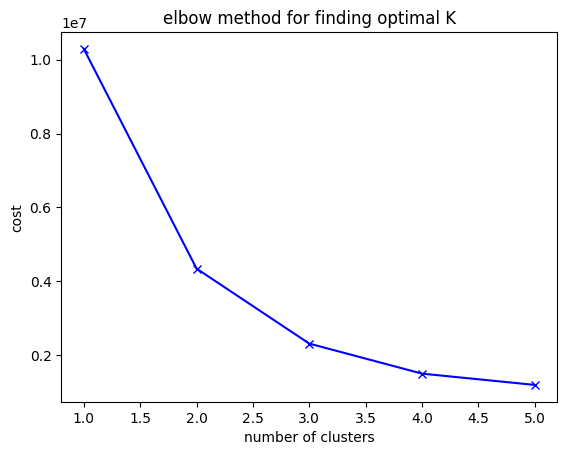

In [119]:
# KPrototype 엘보우 커브 시각화
cost = []
K = range(1, 6)
for num in K:
    kprototype = KPrototypes(n_clusters = num, n_init=10,  max_iter=500, random_state=0)
    kprototype.fit_predict(CS5, categorical=[1,2,3,4,5,6,7])
    cost.append(kprototype.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.title('elbow method for finding optimal K')
plt.show()

### 군집 별 특성 파악

In [166]:
from matplotlib import rc
rc('font', family='AppleGothic')

<Axes: >

Text(0.5, 1.0, '1번 군집의 가장 많이 지출한 문화예술분야')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

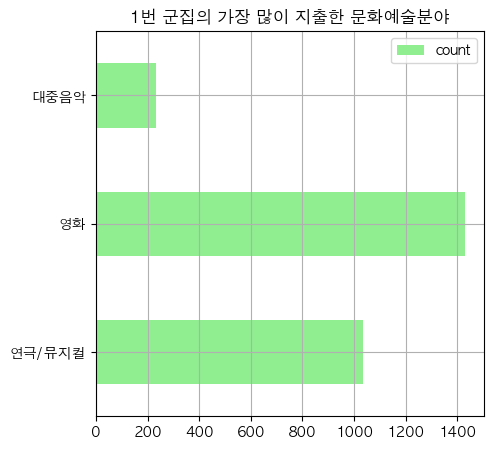

In [189]:
# 1번 군집의 가장 많이 지출한 항목(expense) 특성 파악
df_1 = CS5[CS5['cluster_3']==1][['expense']].value_counts().to_frame().sort_index()
df_1 = df_1.loc[[12,14,15]]
df_1.index = ['연극/뮤지컬', '영화', '대중음악']
df_1.plot(kind='barh', grid=True, figsize=(5,5), color='lightgreen')
plt.title('1번 군집의 가장 많이 지출한 문화예술분야')
plt.xticks(rotation='horizontal')

<Axes: >

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

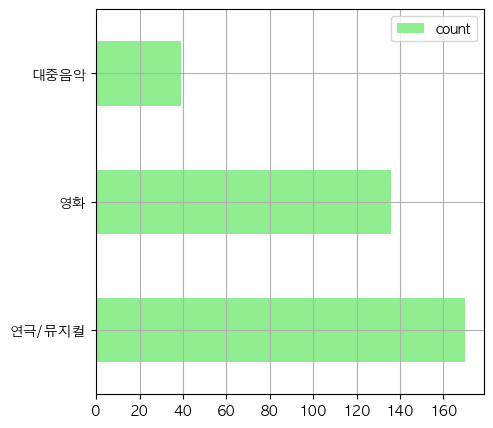

In [180]:
# 2번 군집의 가장 많이 지출한 항목(expense) 특성 파악
df_2 = CS5[CS5['cluster_3']==2][['expense']].value_counts().to_frame().sort_index()
df_2 = df_2.loc[[12,14,15]]
df_2.index = ['연극/뮤지컬', '영화', '대중음악']
df_2.plot(kind='barh', grid=True, figsize=(5,5), color='lightgreen')
plt.xticks(rotation='horizontal')

<Axes: >

Text(0.5, 1.0, '0번 군집의 가장 많이 지출한 문화예술분야')

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0'),
  Text(22.5, 0, '22.5')])

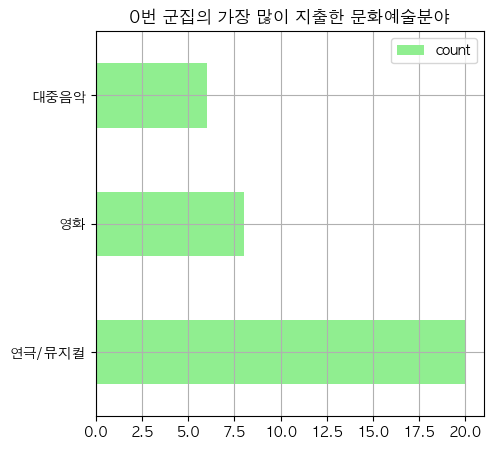

In [188]:
# 0번 군집의 가장 많이 지출한 항목(expense) 특성 파악
df_0 = CS5[CS5['cluster_3']==0][['expense']].value_counts().to_frame().sort_index()
df_0 = df_0.loc[[12,14,15]]
df_0.index = ['연극/뮤지컬', '영화', '대중음악']
df_0.plot(kind='barh', grid=True, figsize=(5,5), color='lightgreen')
plt.title('0번 군집의 가장 많이 지출한 문화예술분야')
plt.xticks(rotation='horizontal')